# Feature Selection
1. Wrapper
2. Filter
3. Embedded

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

import matplotlib.font_manager as fm

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

ModuleNotFoundError: No module named 'xgboost'

In [2]:
# 라이브러리 호출
import pandas as pd
from sklearn.model_selection import train_test_split

# 경고창 제거
import warnings
warnings.filterwarnings('ignore')

In [54]:
X = pd.read_csv('../DATA/',index_col=0)
df.head()

,basis,basis_risk,basis_disparate_ratio,cd_p_change(%),cd_p_range,cny_yesterday_change,cny_night_change,jpy_yesterday_change,jpy_night_change,kospi_p_change(%),...,call_volume_fluc,sp_close_change,sp_day_change,sp_day_fluc_range,usd_yesterday_change,usd_night_change,vix_close_change,vix_day_change,vix_day_fluc_range,VKOSPI_Label
date,,,,,,,,,,,,,,,,,,,,,
2023-07-31,3.13,-0.43,0.904,0.000,0.00,0.346,-0.824,0.102,0.420,-0.027,...,-7.832,0.99,0.361,26.15,-0.883,0.039,-7.49,-4.989,0.91,0
2023-08-01,3.56,-0.43,1.019,0.000,0.00,0.534,-0.908,0.743,-0.874,0.331,...,17.359,0.15,0.090,21.08,0.356,0.033,2.25,-2.504,0.52,0
2023-08-02,3.49,-0.07,1.000,0.000,0.00,0.304,-0.883,0.494,-1.270,-0.035,...,20.248,-0.27,-0.046,17.09,0.839,0.031,2.20,1.309,0.55,1
2023-08-03,2.09,-1.40,0.607,-0.267,-0.01,0.248,-0.638,0.860,-1.427,0.199,...,-4.319,-1.38,-0.825,45.18,0.739,0.042,15.51,2.484,1.53,1
2023-08-04,3.31,1.22,0.969,-0.268,-0.01,-0.093,-0.176,-0.304,-0.573,0.065,...,24.606,-0.25,0.170,33.95,-0.035,0.071,-1.06,-5.069,1.70,0


In [55]:
X = df.drop(columns='VKOSPI_Label', axis=1)
y = df[['VKOSPI_Label']]

In [56]:
# 학습 데이터와 검증 데이터 분리
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
df.columns

Index(['basis', 'basis_risk', 'basis_disparate_ratio', 'cd_p_change(%)',
       'cd_p_range', 'cny_yesterday_change', 'cny_night_change',
       'jpy_yesterday_change', 'jpy_night_change', 'kospi_p_change(%)',
       'kospi_p_range', 'ks200_p_change(%)', 'ks200_p_range',
       'NAS_close_change', 'NAS_day_change', 'NAS_day_fluc_range',
       'niv_night_change', 'P/C Ratio', 'put_volume_fluc', 'call_volume_fluc',
       'sp_close_change', 'sp_day_change', 'sp_day_fluc_range',
       'usd_yesterday_change', 'usd_night_change', 'vix_close_change',
       'vix_day_change', 'vix_day_fluc_range', 'VKOSPI_Label'],
      dtype='object')

In [58]:
# 표준화
features_to_standardize = ['basis', 'basis_risk', 'basis_disparate_ratio', 'cd_p_change(%)',
       'cd_p_range', 'cny_yesterday_change', 'cny_night_change',
       'jpy_yesterday_change', 'jpy_night_change', 'kospi_p_change(%)',
       'kospi_p_range', 'ks200_p_change(%)', 'ks200_p_range',
       'NAS_close_change', 'NAS_day_change', 'NAS_day_fluc_range',
       'niv_night_change', 'P/C Ratio', 'put_volume_fluc', 'call_volume_fluc',
       'sp_close_change', 'sp_day_change', 'sp_day_fluc_range',
       'usd_yesterday_change', 'usd_night_change', 'vix_close_change',
       'vix_day_change', 'vix_day_fluc_range']
scaler_standardize = StandardScaler()
X_train = scaler_standardize.fit_transform(X_train[features_to_standardize])
X_val = scaler_standardize.transform(X_val[features_to_standardize])

X_train = pd.DataFrame(X_train, columns=features_to_standardize)
X_val = pd.DataFrame(X_val, columns=features_to_standardize)

## RF 기반 feature importance

In [59]:
# Feature_Importances

rfc = RandomForestClassifier(random_state=42)

rfc.fit(X_train, y_train)

rfc.feature_importances_

ftr_importances = pd.Series(rfc.feature_importances_, index=X_train.columns)
sorted_feature_importance = ftr_importances.sort_values(ascending=True)

data = sorted_feature_importance
importance = pd.DataFrame(data, columns=['feature importances'])
importance

,feature importances
cny_night_change,0.010804
NAS_close_change,0.013072
sp_day_change,0.015000
jpy_yesterday_change,0.017107
NAS_day_change,0.017138
cd_p_range,0.017207
P/C Ratio,0.019188
vix_day_fluc_range,0.023127
usd_night_change,0.024000
NAS_day_fluc_range,0.024223


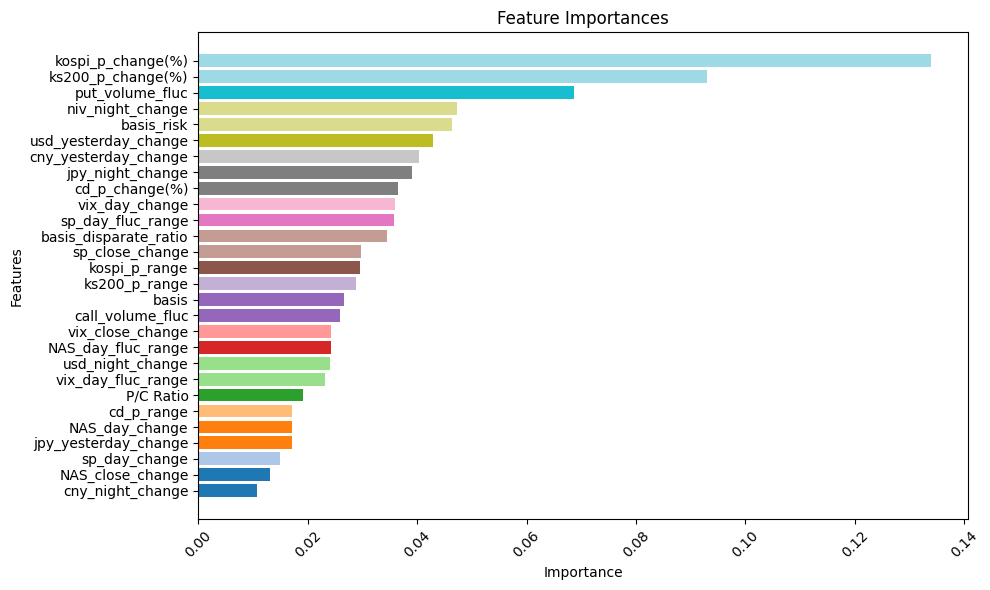

In [60]:
plt.figure(figsize=(10, 6))
colors = plt.cm.tab20(np.linspace(0, 1, len(importance)))

plt.barh(importance.index, importance['feature importances'], color=colors)  # Changed to barh for horizontal bar chart
plt.ylabel('Features')  # Changed to 'Features' for Y-axis label
plt.xlabel('Importance')  # Changed to 'Importance' for X-axis label
plt.title('Feature Importances')

# Rotating x labels for better visibility if needed
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

# Logit기반 피쳐 갯수 선정

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
import statsmodels.api as sm
import numpy as np
lr_clf = LogisticRegression()


logit = SelectFromModel(LogisticRegression())
logit.fit(X_train, y_train)
logit_support = logit.get_support()
lr_feature = X_train.loc[:,logit_support].columns.tolist()

In [62]:
print(lr_feature)
print(len(lr_feature))

['basis', 'basis_risk', 'basis_disparate_ratio', 'cny_night_change', 'jpy_yesterday_change', 'jpy_night_change', 'kospi_p_range', 'ks200_p_change(%)', 'NAS_day_fluc_range', 'sp_day_change', 'sp_day_fluc_range']
11


## 1. Wrapper : 모델링을 돌리면서 변수를 선택하는 방법

- Forward Selection(전진 선택) : 변수가 없는 상태로 시작하며 반복할 때마다 가장 중요한 변수를 추가하여 더 이상 성능의 향상이 없을 때까지 변수를 추가한다.
- Backward Elimination(후방 제거) : 모든 변수를 가지고 시작하며, 가장 덜 중요한 변수를 하나씩 제거하면서 모델의 성능을 향상시킨다. 더 이상 성능의 향상이 없을 때까지 반복한다.
- Stepwise Selection(단계별 선택): Foward Selection 과 Backward Elimination 을 결합하여 사용하는 방식으로, 모든  변수를 가지고 시작하여 가장 도움이 되지 않는 변수를 삭제하거나, 모델에서 빠져있는 변수 중에서 가장 중요한 변수를 추가하는 방법이다. 이와 같이 변수를 추가 또는 삭제를 반복한다. 반대로 아무것도 없는 모델에서 출발해 변수를 추가, 삭제를 반복할 수도 있다.

In [63]:
# Forward Selection
import pandas as pd
from sklearn.linear_model import LogisticRegression

# Forward feature selection 수행
selected_features = []
best_score = 0

while len(selected_features) < X.shape[1]:
    best_feature = None
    best_model = None
    best_score_local = 0

    for feature in X_train.columns:
        if feature not in selected_features:
            features = selected_features + [feature]
            X_train_selected = X_train[features]
            X_val_selected = X_val[features]

            model = LogisticRegression()
            model.fit(X_train_selected, y_train)
            score = model.score(X_val_selected, y_val)

            if score > best_score_local:
                best_score_local = score
                best_feature = feature
                best_model = model

    if best_score_local > best_score:
        selected_features.append(best_feature)
        best_score = best_score_local
        print(f"Selected feature: {best_feature}, Accuracy: {best_score:.4f}")

    else:
        break

print("\nForward selected features:")
Forward = selected_features


Selected feature: basis, Accuracy: 0.8182
Selected feature: vix_close_change, Accuracy: 0.9091

Forward selected features:


In [64]:
# Backward Elimination
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Backward feature selection 수행
selected_features = X_train.columns.tolist()
best_score = 0

while len(selected_features) > 0:
    worst_feature = None
    best_model = None
    best_score_local = 0

    for feature in selected_features:
        features = selected_features.copy()
        features.remove(feature)

        X_train_selected = X_train[features]
        X_val_selected = X_val[features]

        model = LogisticRegression()
        model.fit(X_train_selected, y_train)
        score = model.score(X_val_selected, y_val)

        if score > best_score_local:
            best_score_local = score
            worst_feature = feature
            best_model = model

    if best_score_local > best_score:
        selected_features.remove(worst_feature)
        best_score = best_score_local
        print(f"Removed feature: {worst_feature}, Accuracy: {best_score:.4f}")

    else:
        break

print("\nFinal selected features:")
Backward = selected_features


Removed feature: basis, Accuracy: 0.8182

Final selected features:


In [65]:
# Stepwise Selection
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Stepwise feature selection 수행
selected_features = []
best_score = 0

# Forward step
while len(selected_features) < X.shape[1]:
    best_feature = None
    best_model = None
    best_score_local = 0

    for feature in X_train.columns:
        if feature not in selected_features:
            features = selected_features + [feature]
            X_train_selected = X_train[features]
            X_val_selected = X_val[features]

            model = LogisticRegression()
            model.fit(X_train_selected, y_train)
            score = model.score(X_val_selected, y_val)

            if score > best_score_local:
                best_score_local = score
                best_feature = feature
                best_model = model

    if best_score_local > best_score:
        selected_features.append(best_feature)
        best_score = best_score_local
        print(f"Selected feature: {best_feature}, Accuracy: {best_score:.4f}")

    else:
        break

# Backward step
while len(selected_features) > 0:
    worst_feature = None
    best_model = None
    best_score_local = 0

    for feature in selected_features:
        features = selected_features.copy()
        features.remove(feature)

        X_train_selected = X_train[features]
        X_val_selected = X_val[features]

        model = LogisticRegression()
        model.fit(X_train_selected, y_train)
        score = model.score(X_val_selected, y_val)

        if score > best_score_local:
            best_score_local = score
            worst_feature = feature
            best_model = model

    if best_score_local > best_score:
        selected_features.remove(worst_feature)
        best_score = best_score_local
        print(f"Removed feature: {worst_feature}, Accuracy: {best_score:.4f}")

    else:
        break

print("\nFinal selected features:")
Stepwise = selected_features


Selected feature: basis, Accuracy: 0.8182
Selected feature: vix_close_change, Accuracy: 0.9091

Final selected features:


## 3. Embedded
- Lasso, Ridge, Elastic Net 등 내장함수 사용하여 변수를 선택하는 방법

In [66]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.simplefilter('ignore')

lasso_model = LogisticRegression()
param_grid = {'penalty' : ['l1'], 
                'C' : [0.001, 0.01, 0.1, 1, 2, 5, 10],
                'solver' : ['liblinear']}

grid_search = GridSearchCV(lasso_model, param_grid=param_grid, return_train_score=True, cv=5)
grid_search.fit(X_train, y_train)

df = pd.DataFrame(grid_search.cv_results_)
df = df.sort_values(by=['rank_test_score'], ascending=True)
df[['params', 'mean_train_score', 'mean_test_score', 'rank_test_score']]
print('GridSearchCV 최적 파라미터:', grid_search.best_params_)
print('GridSearchCV 최고 정확도:{0:.4f}'.format(grid_search.best_score_))

GridSearchCV 최적 파라미터: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
GridSearchCV 최고 정확도:0.6722


In [67]:
lasso_best = LogisticRegression(C=1, penalty='l1', solver='liblinear').fit(X_train, y_train)

df_lasso = pd.DataFrame()
df_lasso['feature'] = X_train.columns
df_lasso['coef'] = lasso_best.coef_[0]
df_lasso.drop(df_lasso[df_lasso['coef']==0].index, inplace=True)
df_lasso

,feature,coef
1,basis_risk,-0.019965
2,basis_disparate_ratio,-0.668734
3,cd_p_change(%),0.104695
7,jpy_yesterday_change,-0.038142
10,kospi_p_range,0.915127
11,ks200_p_change(%),-0.852719
17,P/C Ratio,-0.026026
18,put_volume_fluc,-0.438347
22,sp_day_fluc_range,-0.141967
24,usd_night_change,-0.007486


In [68]:
# 라쏘에서 선택된 피처
lasso = df_lasso['feature'].values.tolist()
print('Lasso에서 선택된 피처 수 {0:1.0f}'.format(len(df_lasso)), '개')
lasso

Lasso에서 선택된 피처 수 11 개


['basis_risk',
 'basis_disparate_ratio',
 'cd_p_change(%)',
 'jpy_yesterday_change',
 'kospi_p_range',
 'ks200_p_change(%)',
 'P/C Ratio',
 'put_volume_fluc',
 'sp_day_fluc_range',
 'usd_night_change',
 'vix_close_change']

In [69]:
list_Forward = list(Forward)
list_Backward = list(Backward)
list_Stepwise = list(Stepwise)
list_lasso = list(lasso)
list_col_all = X_train.columns

In [70]:
def func_Forward(x):
    if x in list_Forward:
        return 1
    else:
        return 0
    
def func_Backward(x):
    if x in list_Backward:
        return 1
    else:
        return 0


def func_Stepwise(x):
    if x in list_Stepwise:
        return 1
    else:
        return 0

    
def func_lasso(x):
    if x in list_lasso:
        return 1
    else:
        return 0

In [71]:
# 2번 선택된 Feature

feature_counts = pd.DataFrame()
feature_counts['Feature'] = list_col_all
feature_counts['Forward'] = list_col_all.map(func_Forward)
feature_counts['Backward'] = list_col_all.map(func_Backward)
feature_counts['Stepwise'] = list_col_all.map(func_Stepwise)
feature_counts['lasso'] = list_col_all.map(func_lasso)

feature_counts["total"] = feature_counts["Forward"]+feature_counts['Backward']+feature_counts["Stepwise"]+feature_counts["lasso"]
feature_final = feature_counts[feature_counts["total"]>=2]
list_feature_final = list(feature_final["Feature"])
print("선택된 피쳐수 :", len(list_feature_final))
feature_final

선택된 피쳐수 : 12


,Feature,Forward,Backward,Stepwise,lasso,total
0,basis,1,0,1,0,2
1,basis_risk,0,1,0,1,2
2,basis_disparate_ratio,0,1,0,1,2
3,cd_p_change(%),0,1,0,1,2
7,jpy_yesterday_change,0,1,0,1,2
10,kospi_p_range,0,1,0,1,2
11,ks200_p_change(%),0,1,0,1,2
17,P/C Ratio,0,1,0,1,2
18,put_volume_fluc,0,1,0,1,2
22,sp_day_fluc_range,0,1,0,1,2


In [72]:
feature_final[['Feature']]
np.array(feature_final[['Feature']])

array([['basis'],
       ['basis_risk'],
       ['basis_disparate_ratio'],
       ['cd_p_change(%)'],
       ['jpy_yesterday_change'],
       ['kospi_p_range'],
       ['ks200_p_change(%)'],
       ['P/C Ratio'],
       ['put_volume_fluc'],
       ['sp_day_fluc_range'],
       ['usd_night_change'],
       ['vix_close_change']], dtype=object)

In [73]:
# 3번 선택된 Feature

feature_counts = pd.DataFrame()
feature_counts['Feature'] = list_col_all
feature_counts['Forward'] = list_col_all.map(func_Forward)
feature_counts['Backward'] = list_col_all.map(func_Backward)
feature_counts['Stepwise'] = list_col_all.map(func_Stepwise)
feature_counts['lasso'] = list_col_all.map(func_lasso)

feature_counts["total"] = feature_counts["Forward"]+feature_counts['Backward']+feature_counts["Stepwise"]+feature_counts["lasso"]
feature_final = feature_counts[feature_counts["total"]>=3]
list_feature_final = list(feature_final["Feature"])
print("선택된 피쳐수 :", len(list_feature_final))
feature_final

선택된 피쳐수 : 1


,Feature,Forward,Backward,Stepwise,lasso,total
25,vix_close_change,1,1,1,1,4


In [74]:
X_train = X_train[['basis','basis_risk',
       'basis_disparate_ratio',
       'cd_p_change(%)',
       'jpy_yesterday_change',
       'kospi_p_range',
       'ks200_p_change(%)',
       'P/C Ratio',
       'put_volume_fluc',
       'sp_day_fluc_range',
       'usd_night_change',
       'vix_close_change']]
X_val = X_val[['basis','basis_risk',
       'basis_disparate_ratio',
       'cd_p_change(%)',
       'jpy_yesterday_change',
       'kospi_p_range',
       'ks200_p_change(%)',
       'P/C Ratio',
       'put_volume_fluc',
       'sp_day_fluc_range',
       'usd_night_change',
       'vix_close_change']]

In [75]:
from sklearn.model_selection import GridSearchCV

def model_basic_with_gridsearch(X_train, y_train, X_val, y_val):
    # 모델 및 해당 하이퍼파라미터 그리드 정의
    models_and_grids = {
        LogisticRegression(): {
            'penalty': ['l1', 'l2'],
            'C': [0.01, 0.1, 1, 10]
        },
        DecisionTreeClassifier(): {
            'max_depth': [1,3,7,10],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        },
        SVC(): {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf']
        },
        RandomForestClassifier(): {
            'n_estimators': [5,10,15,20],
            'max_depth': [1,3,7,10],
            'min_samples_split': [2, 5, 10]
        },
        XGBClassifier(): {
            'n_estimators': [5,10,15,20],
            'learning_rate': [0.01, 0.1, 0.5]
        },
        LGBMClassifier(): {
            'n_estimators': [5,10,15,20],
            'learning_rate': [0.01, 0.1, 0.5]
        }
    }

    rdict = {'model': [], 'best_params': [], 'accuracy': [], 'precision': [], 'recall': [], 'f1_score': []}

    for model, grid in models_and_grids.items():
        clf = GridSearchCV(model, grid, cv=5)
        clf.fit(X_train, y_train)
        best_model = clf.best_estimator_

        pred = best_model.predict(X_val)
        results = (round(accuracy_score(y_val, pred), 2),
                   round(precision_score(y_val, pred, average='weighted'), 2),
                   round(recall_score(y_val, pred, average='weighted'), 2),
                   round(f1_score(y_val, pred, average='weighted'), 2))

        rdict['model'].append(best_model.__class__.__name__)
        rdict['best_params'].append(clf.best_params_)
        rdict['accuracy'].append(results[0])
        rdict['precision'].append(results[1])
        rdict['recall'].append(results[2])
        rdict['f1_score'].append(results[3])

    rdf = pd.DataFrame(data=rdict)
    return rdf


In [76]:
model_basic_with_gridsearch(X_train, y_train, X_val, y_val)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 13, number of negative: 21
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 34, number of used features: 0
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382353 -> initscore=-0.479573
[LightGBM] [Info] Start training from score -0.479573
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves 

,model,best_params,accuracy,precision,recall,f1_score
0,LogisticRegression,"{'C': 0.1, 'penalty': 'l2'}",0.73,0.81,0.73,0.67
1,DecisionTreeClassifier,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...",0.55,0.52,0.55,0.53
2,SVC,"{'C': 0.1, 'kernel': 'linear'}",0.73,0.81,0.73,0.67
3,RandomForestClassifier,"{'max_depth': 7, 'min_samples_split': 5, 'n_es...",0.82,0.86,0.82,0.80
4,XGBClassifier,"{'learning_rate': 0.5, 'n_estimators': 20}",0.73,0.81,0.73,0.67
5,LGBMClassifier,"{'learning_rate': 0.01, 'n_estimators': 5}",0.64,0.40,0.64,0.49
